### Task
The second assignment deals with Random Forests. Random forests are predictive models that allow for a data driven exploration of many explanatory variables in predicting a response or target variable. Random forests provide importance scores for each explanatory variable and also allow you to evaluate any increases in correct classification with the growing of smaller and larger number of trees.

Run a Random Forest.

You will need to perform a random forest analysis to evaluate the importance of a series of explanatory variables in predicting a binary, categorical response variable.

### Data
The dataset is related to red  variants of the Portuguese "Vinho Verde" wine.  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). 

The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. 

Dataset can be found at [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)

Attribute Information (For more information, read [Cortez et al., 2009]): 
Input variables (based on physicochemical tests): 
* 1 - fixed acidity 
* 2 - volatile acidity 
* 3 - citric acid 
* 4 - residual sugar 
* 5 - chlorides 
* 6 - free sulfur dioxide 
* 7 - total sulfur dioxide 
* 8 - density 
* 9 - pH 
* 10 - sulphates 
* 11 - alcohol 

Output variable (based on sensory data): 
* 12 - quality (score between 0 and 10)

### Results

Random forest and ExtraTrees classifier were deployed to evaluate the importance of a series of explanatory variables in predicting a categorical response variable  - red wine quality (score between 0 and 10). The following explanatory variables were included: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates and alcohol.

The explanatory variables with the highest importance score (evaluated by both classifiers) are alcohol, volatile acidity, sulphates. The accuracy of the Random forest and ExtraTrees clasifier is about 67%, which is quite good for highly unbalanced and hardly distinguished from each other classes. The subsequent growing of multiple trees rather than a single tree, adding a lot to the overall score of the model. For Random forest the number of estimators is 20, while for ExtraTrees classifier - 12, because the second classifier grows up much faster.

### Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline

rnd_state = 4536

In [2]:
data = pd.read_csv('Data\winequality-red.csv', sep=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Plots
For visualization purposes, the number of dimensions was reduced to two by applying MDS method with cosine distance. The plot illustrates that our classes are not clearly divided into parts.

In [5]:
model = MDS(random_state=rnd_state, n_components=2, dissimilarity='precomputed')
%time representation = model.fit_transform(pairwise_distances(data.iloc[:, :11], metric='cosine'))

Wall time: 38.7 s


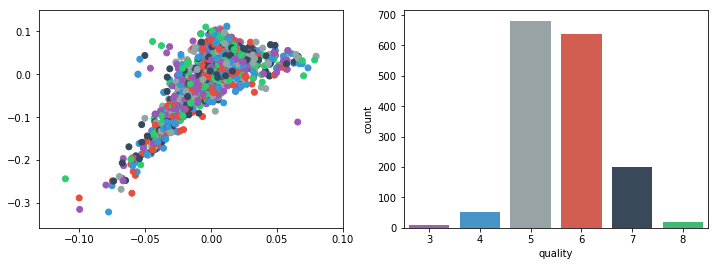

In [6]:
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.scatter(representation[:, 0], representation[:, 1], c=colors)

plt.subplot(122)
sns.countplot(x='quality', data=data, palette=sns.color_palette(colors));

Moreover, our classes are highly unbalanced, so in our classifier we should add parameter class_weight='balanced'.

In [7]:
predictors = data.iloc[:, :11]
target = data.quality

In [8]:
(predictors_train, predictors_test,
 target_train, target_test) = train_test_split(predictors, target, test_size = .3, random_state = rnd_state)

#### RandomForest classifier 

In [9]:
list_estimators = list(range(1, 50, 5))
rf_scoring = []
for n_estimators in list_estimators:
    classifier = RandomForestClassifier(random_state = rnd_state, n_jobs = -1, 
                                        class_weight='balanced', n_estimators=n_estimators)
    score = cross_val_score(classifier, predictors_train, target_train, cv=5, 
                            n_jobs=-1, scoring = 'accuracy') 
    rf_scoring.append(score.mean())

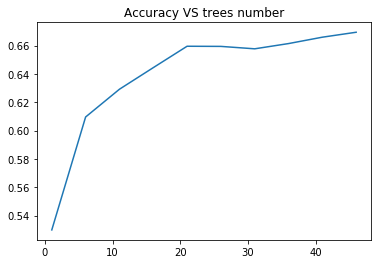

In [10]:
plt.plot(list_estimators, rf_scoring)
plt.title('Accuracy VS trees number');

In [11]:
classifier = RandomForestClassifier(random_state = rnd_state, n_jobs = -1, 
                                    class_weight='balanced', n_estimators=20)
classifier.fit(predictors_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=-1, oob_score=False, random_state=4536,
            verbose=0, warm_start=False)

In [12]:
prediction = classifier.predict(predictors_test)

In [13]:
print('Confusion matrix:\n', pd.crosstab(target_test, prediction, colnames=['Predicted'], 
                                         rownames=['Actual'], margins=True))
print('\nAccuracy: ', accuracy_score(target_test, prediction))

Confusion matrix:
 Predicted  3  4    5    6   7  All
Actual                            
3          0  0    3    0   0    3
4          0  1    9    6   0   16
5          2  1  166   41   3  213
6          0  0   46  131  14  191
7          0  0    5   25  23   53
8          0  0    0    3   1    4
All        2  2  229  206  41  480

Accuracy:  0.66875


In [14]:
feature_importance = pd.Series(classifier.feature_importances_, 
                               index=data.columns.values[:11]).sort_values(ascending=False)
feature_importance

volatile acidity        0.133023
alcohol                 0.130114
sulphates               0.129498
citric acid             0.106427
total sulfur dioxide    0.094647
chlorides               0.086298
density                 0.079843
pH                      0.066566
residual sugar          0.061344
fixed acidity           0.058251
free sulfur dioxide     0.053990
dtype: float64

In [15]:
et_scoring = []
for n_estimators in list_estimators:
    classifier = ExtraTreesClassifier(random_state = rnd_state, n_jobs = -1, 
                                        class_weight='balanced', n_estimators=n_estimators)
    score = cross_val_score(classifier, predictors_train, target_train, cv=5, 
                            n_jobs=-1, scoring = 'accuracy') 
    et_scoring.append(score.mean())

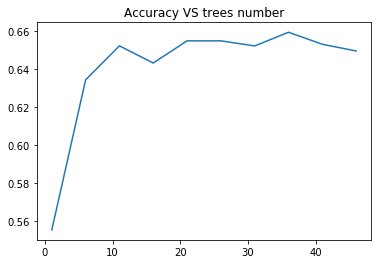

In [16]:
plt.plot(list_estimators, et_scoring)
plt.title('Accuracy VS trees number');

In [17]:
classifier = ExtraTreesClassifier(random_state = rnd_state, n_jobs = -1, 
                                    class_weight='balanced', n_estimators=12)
classifier.fit(predictors_train, target_train)

ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=12, n_jobs=-1, oob_score=False, random_state=4536,
           verbose=0, warm_start=False)

In [18]:
prediction = classifier.predict(predictors_test)

In [19]:
print('Confusion matrix:\n', pd.crosstab(target_test, prediction, colnames=['Predicted'], 
                                         rownames=['Actual'], margins=True))
print('\nAccuracy: ', accuracy_score(target_test, prediction))

Confusion matrix:
 Predicted  3  4    5    6   7  8  All
Actual                               
3          0  1    2    0   0  0    3
4          0  0    9    7   0  0   16
5          2  2  168   39   2  0  213
6          0  0   49  130  11  1  191
7          0  0    2   27  24  0   53
8          0  0    0    3   1  0    4
All        2  3  230  206  38  1  480

Accuracy:  0.6708333333333333


In [20]:
feature_importance = pd.Series(classifier.feature_importances_, 
                               index=data.columns.values[:11]).sort_values(ascending=False)
feature_importance

alcohol                 0.157267
volatile acidity        0.132768
sulphates               0.100874
citric acid             0.095077
density                 0.082334
chlorides               0.079283
total sulfur dioxide    0.076803
pH                      0.074638
fixed acidity           0.069826
residual sugar          0.066551
free sulfur dioxide     0.064579
dtype: float64